In [241]:
import os
pwd = os.getcwd()

blaspp_source = "/home/weslleyp/storage/blaspp"
lapackpp_source = "/home/weslleyp/storage/lapackpp"
tlapack_source = "/home/weslleyp/storage/tlapack"

tlapack_DIR = pwd+"/tlapack"
tlapackMKL_DIR = pwd+"/tlapack_mkl"
blaspp_DIR = pwd+"/blaspp"
lapackpp_DIR = pwd+"/lapackpp"

In [242]:
# System:
!uname -a

Linux weslleyp-XPS-15-9510 5.14.0-1054-oem #61-Ubuntu SMP Fri Oct 14 13:05:50 UTC 2022 x86_64 x86_64 x86_64 GNU/Linux


In [243]:
# Machine:
!lscpu

Architecture:                    x86_64
CPU op-mode(s):                  32-bit, 64-bit
Byte Order:                      Little Endian
Address sizes:                   39 bits physical, 48 bits virtual
CPU(s):                          16
On-line CPU(s) list:             0-15
Thread(s) per core:              2
Core(s) per socket:              8
Socket(s):                       1
NUMA node(s):                    1
Vendor ID:                       GenuineIntel
CPU family:                      6
Model:                           141
Model name:                      11th Gen Intel(R) Core(TM) i7-11800H @ 2.30GHz
Stepping:                        1
CPU MHz:                         2300.000
CPU max MHz:                     4600.0000
CPU min MHz:                     800.0000
BogoMIPS:                        4608.00
Virtualization:                  VT-x
L1d cache:                       384 KiB
L1i cache:                       256 KiB
L2 cache:                        10 MiB
L3 cache:              

In [244]:
# Eigen version:
!cat /usr/lib/cmake/eigen3/Eigen3Config.cmake | grep EIGEN3_VERSION_STRING

set (EIGEN3_VERSION_STRING "3.3.7")


In [245]:
# MKL version:
!which mkl_link_tool

/opt/intel/oneapi/mkl/2022.2.1/bin/intel64/mkl_link_tool


In [246]:
#Build without MKL

# Install <T>LAPACK
!cmake -B "$tlapack_DIR" -G Ninja -D CMAKE_BUILD_TYPE=Release -D BUILD_EXAMPLES=OFF -D BUILD_TESTING=OFF -D CMAKE_INSTALL_PREFIX="$tlapack_DIR" -D CMAKE_INSTALL_MESSAGE="LAZY" "$tlapack_source"
!cmake --build "$tlapack_DIR" --target install

# Build
!cmake -B build -G Ninja -D CMAKE_BUILD_TYPE=Release -D CMAKE_PREFIX_PATH="."
!cmake --build build

-- <T>LAPACK version 0.1.1
-- Submodule update
-- Configuring done
-- Generating done
-- Build files have been written to: /home/weslleyp/storage/tlapack/examples/performance_eigen/tlapack
[0/1] Install the project...
-- Install configuration: "Release"
-- Configuring done
-- Generating done
-- Build files have been written to: /home/weslleyp/storage/tlapack/examples/performance_eigen/build
ninja: no work to do.


In [247]:
!./build/performance_eigen 1000

Reference:
First eigenvalues:
(499.882,0)
(8.92161,0)
-x-x-x-x-x-x-x-x-
Using Eigen:
First eigenvalues:
(499.883,0)
(8.92164,0)
Error in the eigenvalues: 0.00998675
time = 1.5691 s
Reference:
First eigenvalues:
(499.882,0)
(8.92161,0)
-x-x-x-x-x-x-x-x-
Using Eigen:
First eigenvalues:
(499.882,0)
(8.92161,0)
Error in the eigenvalues: 2.33553e-15
time = 2.78988 s


In [248]:
!./build/performance_tlapack 1000

Reference:
First eigenvalues:
(499.882,0)
(8.92161,0)
-x-x-x-x-x-x-x-x-
Using <T>LAPACK:
First eigenvalues:
(499.883,0)
(8.92161,0)
Error in the eigenvalues: 0.00998681
time = 0.976849 s
||Z.adjoint() Z - I||/||I|| = 0
||Z.adjoint() H Z - T||/||T|| = 828.706
n_aed = 41
n_sweep = 7
n_shifts_total = 448
Reference:
First eigenvalues:
(499.882,0)
(8.92161,0)
-x-x-x-x-x-x-x-x-
Using <T>LAPACK:
First eigenvalues:
(499.882,0)
(8.92161,0)
Error in the eigenvalues: 2.46726e-15
time = 1.57934 s
||Z.adjoint() Z - I||/||I|| = 0
||Z.adjoint() H Z - T||/||T|| = 826.093
n_aed = 41
n_sweep = 13
n_shifts_total = 832


In [249]:
#Build with MKL

# Install BLAS++
!cmake -B "$blaspp_DIR" -G Ninja -D CMAKE_BUILD_TYPE=Release -D build_tests=OFF -D CMAKE_INSTALL_PREFIX="$blaspp_DIR" -D CMAKE_INSTALL_MESSAGE="LAZY" "$blaspp_source"
!cmake --build "$blaspp_DIR" --target install

# Install LAPACK++
!cmake -B "$lapackpp_DIR" -G Ninja -D CMAKE_BUILD_TYPE=Release -D build_tests=OFF -D CMAKE_INSTALL_PREFIX="$lapackpp_DIR" -D CMAKE_INSTALL_MESSAGE="LAZY" -D blaspp_DIR="$blaspp_DIR" "$lapackpp_source"
!cmake --build "$lapackpp_DIR" --target install

# Install <T>LAPACK
!cmake -B "$tlapackMKL_DIR" -G Ninja -D CMAKE_BUILD_TYPE=Release -D BUILD_EXAMPLES=OFF -D BUILD_TESTING=OFF -D CMAKE_INSTALL_PREFIX="$tlapackMKL_DIR" -D CMAKE_INSTALL_MESSAGE="LAZY" -D USE_LAPACKPP_WRAPPERS=ON -D blaspp_DIR="$blaspp_DIR" -D lapackpp_DIR="$lapackpp_DIR" "$tlapack_source"
!cmake --build "$tlapackMKL_DIR" --target install

# Build
!cmake -B build_mkl -G Ninja -D CMAKE_BUILD_TYPE=Release -D tlapack_DIR="$tlapackMKL_DIR" -D blaspp_DIR="$blaspp_DIR" -D lapackpp_DIR="$lapackpp_DIR" -D USE_MKL=ON
!cmake --build build_mkl

-- Using CMAKE_INSTALL_PREFIX = /home/weslleyp/storage/tlapack/examples/performance_eigen/blaspp
-- Not building CUDA support in BLAS++
-- Looking for HIP/ROCm
-- Not building HIP/ROCm support in BLAS++
-- blaspp_id = c498e8d
-- Configuring done
-- Generating done
-- Build files have been written to: /home/weslleyp/storage/tlapack/examples/performance_eigen/blaspp
[0/1] Install the project...
-- Install configuration: "Release"
-- Using CMAKE_INSTALL_PREFIX = /home/weslleyp/storage/tlapack/examples/performance_eigen/lapackpp
-- Not building CUDA support in LAPACK++
-- Looking for HIP/ROCm
-- Not building HIP/ROCm support in LAPACK++
-- lapackpp_id = 17edf95
-- Check for BLAS++
   Found BLAS++: /home/weslleyp/storage/tlapack/examples/performance_eigen/blaspp
-- Configuring done
-- Generating done
-- Build files have been written to: /home/weslleyp/storage/tlapack/examples/performance_eigen/lapackpp
[0/1] Install the project...
-- Install configuration: "Release"
-- <T>LAPACK version 0.1

In [250]:
!./build_mkl/performance_eigen 1000 0

-x-x-x-x-x-x-x-x-
-x-x-x-MKL-x-x-x-
Using Eigen:
First eigenvalues:
(499.882,0)
(8.92162,0)
Error in the eigenvalues: inf
time = 0.400565 s
-x-x-x-x-x-x-x-x-
-x-x-x-MKL-x-x-x-
Using Eigen:
First eigenvalues:
(499.882,0)
(8.92161,0)
Error in the eigenvalues: -nan
time = 0.559561 s


In [251]:
!./build_mkl/performance_tlapack 1000 0

-x-x-x-x-x-x-x-x-
Using <T>LAPACK:
First eigenvalues:
(499.882,0)
(8.92166,0)
Error in the eigenvalues: -nan
time = 0.238441 s
||Z.adjoint() Z - I||/||I|| = 0
||Z.adjoint() H Z - T||/||T|| = 830.628
n_aed = 39
n_sweep = 7
n_shifts_total = 448
-x-x-x-x-x-x-x-x-
Using <T>LAPACK:
First eigenvalues:
(499.882,0)
(8.92161,0)
Error in the eigenvalues: -nan
time = 0.354536 s
||Z.adjoint() Z - I||/||I|| = 0
||Z.adjoint() H Z - T||/||T|| = 827.81
n_aed = 41
n_sweep = 13
n_shifts_total = 832


In [252]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

plt.rcParams['font.size'] = 14

In [253]:
nSizes = [10, 25, 50, 100, 200, 400, 800, 1600]
N = len(nSizes)

datatypes = ["float","double"]
NT = len(datatypes)

nRuns = 3

In [254]:
data = np.ones([M,N,NT], dtype=np.float64) * 60 * 60 * 24

executable = [
    "build/performance_tlapack",
    "build/performance_tlapack"
]
M = len(executable)

methods = [
    r"$\langle$T$\rangle$LAPACK - C++",
    r"Eigen3 - C++"
]

for s in range(M):
    for i in range(N):
        n = nSizes[i]
        for j in range(nRuns):
            expr = executable[s]
            output = !$expr {n} 0 | grep time
            for k in range(NT):
                data[s,i,k] = np.minimum( float(output[k].split()[2]), data[s,i,k] )

In [255]:
data

array([[[2.40880e-05, 1.75640e-05],
        [6.18840e-05, 7.54260e-05],
        [2.68579e-04, 3.89268e-04],
        [1.85396e-03, 2.86372e-03],
        [1.19290e-02, 1.75769e-02],
        [7.13812e-02, 1.20622e-01],
        [5.19686e-01, 8.70740e-01],
        [3.29049e+00, 5.65648e+00]],

       [[2.74140e-05, 1.55220e-05],
        [5.95260e-05, 7.24140e-05],
        [2.50870e-04, 3.64299e-04],
        [1.82118e-03, 2.87912e-03],
        [1.14041e-02, 1.80498e-02],
        [7.19438e-02, 1.20806e-01],
        [5.23304e-01, 8.71808e-01],
        [3.24480e+00, 5.73542e+00]]])

float


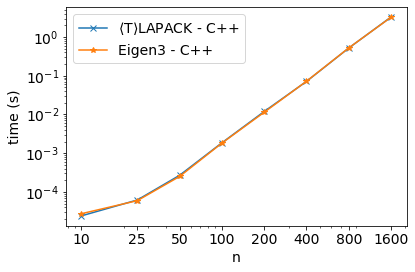

2.632408365759907

In [259]:
fig1, ax1 = plt.subplots()

datatype = 0; print(datatypes[datatype])
m = 0; plt.plot(nSizes,data[m,:,datatype],'x-',label=methods[m])
m = 1; plt.plot(nSizes,data[m,:,datatype],'*-',label=methods[m])

ax1.set_xscale("log")
ax1.set_yscale("log")
ax1.set_xticks(nSizes)
ax1.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

plt.xlabel("n")
plt.ylabel("time (s)")
plt.legend()

plt.tight_layout()
plt.savefig("curvesWithNoMKL.pdf")
plt.show()

rate = (np.log(data[m,-1,datatype])-np.log(data[m,-2,datatype]))/(np.log(nSizes[-1])-np.log(nSizes[-2]))
rate

double


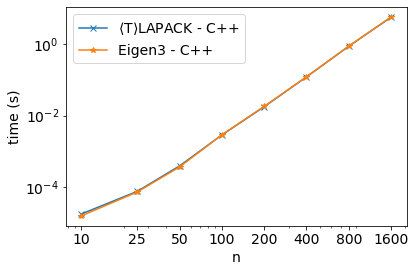

2.7178167899437664

In [261]:
fig1, ax1 = plt.subplots()

datatype = 1; print(datatypes[datatype])
m = 0; plt.plot(nSizes,data[m,:,datatype],'x-',label=methods[m])
m = 1; plt.plot(nSizes,data[m,:,datatype],'*-',label=methods[m])

ax1.set_xscale("log")
ax1.set_yscale("log")
ax1.set_xticks(nSizes)
ax1.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

plt.xlabel("n")
plt.ylabel("time (s)")
plt.legend()

plt.tight_layout()
plt.savefig("curvesWithNoMKL.pdf")
plt.show()

rate = (np.log(data[m,-1,datatype])-np.log(data[m,-2,datatype]))/(np.log(nSizes[-1])-np.log(nSizes[-2]))
rate

In [262]:
data_mkl = np.ones([M,N,NT], dtype=np.float64) * 60 * 60 * 24

executable = [
    "build_mkl/performance_tlapack",
    "build_mkl/performance_tlapack"
]
M = len(executable)

methods = [
    r"$\langle$T$\rangle$LAPACK - C++ using MKL BLAS",
    r"Eigen3 - C++ using MKL gees"
]

for s in range(M):
    for i in range(N):
        n = nSizes[i]
        for j in range(nRuns):
            expr = executable[s]
            output = !$expr {n} 0 | grep time
            for k in range(NT):
                data_mkl[s,i,k] = np.minimum( float(output[k].split()[2]), data_mkl[s,i,k] )

float


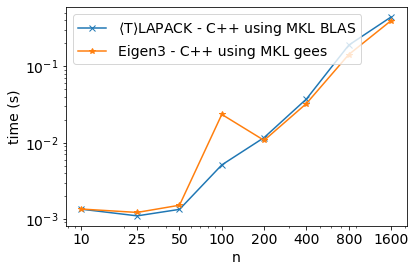

1.4752284113717873

In [263]:
fig1, ax1 = plt.subplots()

datatype = 0; print(datatypes[datatype])
m = 0; plt.plot(nSizes,data_mkl[m,:,datatype],'x-',label=methods[m])
m = 1; plt.plot(nSizes,data_mkl[m,:,datatype],'*-',label=methods[m])

ax1.set_xscale("log")
ax1.set_yscale("log")
ax1.set_xticks(nSizes)
ax1.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

plt.xlabel("n")
plt.ylabel("time (s)")
plt.legend()

plt.tight_layout()
plt.savefig("curvesWithMKL.pdf")
plt.show()

rate = (np.log(data_mkl[m,-1,datatype])-np.log(data_mkl[m,-2,datatype]))/(np.log(nSizes[-1])-np.log(nSizes[-2]))
rate

double


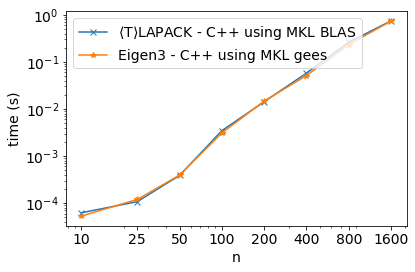

1.650615023237321

In [264]:
fig1, ax1 = plt.subplots()

datatype = 1; print(datatypes[datatype])
m = 0; plt.plot(nSizes,data_mkl[m,:,datatype],'x-',label=methods[m])
m = 1; plt.plot(nSizes,data_mkl[m,:,datatype],'*-',label=methods[m])

ax1.set_xscale("log")
ax1.set_yscale("log")
ax1.set_xticks(nSizes)
ax1.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

plt.xlabel("n")
plt.ylabel("time (s)")
plt.legend()

plt.tight_layout()
plt.savefig("curvesWithMKL.pdf")
plt.show()

rate = (np.log(data_mkl[m,-1,datatype])-np.log(data_mkl[m,-2,datatype]))/(np.log(nSizes[-1])-np.log(nSizes[-2]))
rate